# Figures and plots for Gonzalez et al 2020

In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper')
dat = pd.read_csv('../Data/bx_data.csv', index_col=0)
dat['multiplier'] = ['x'+str(dat.iloc[x]['mult']) for x in np.arange(len(dat))]

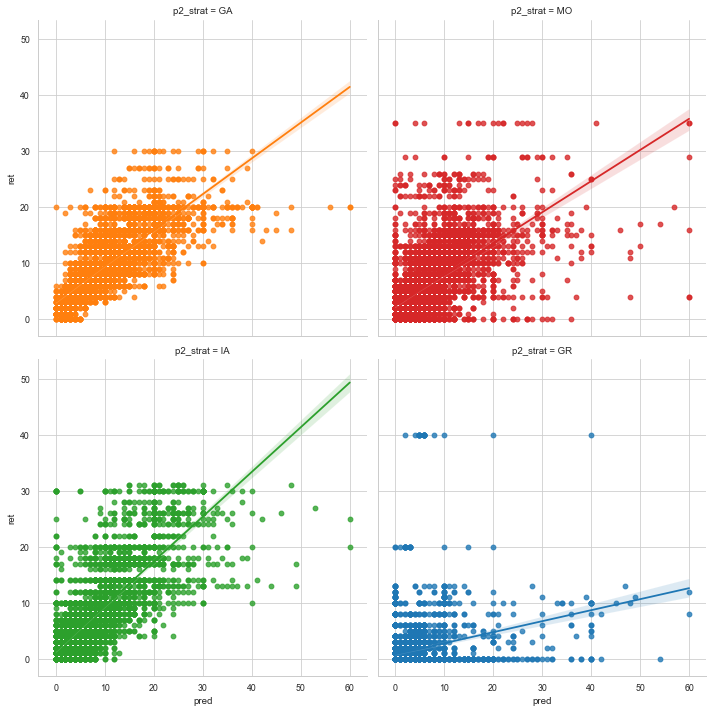

In [20]:
sns.set_style("whitegrid", {"axes.spines.left":"True"})
#sns.axes_style("black")

#sns.despine(left=False, bottom=False)
sns.lmplot(x='pred', y='ret', hue='p2_strat', hue_order=['GR', 'GA','IA','MO'],
           col='p2_strat', col_wrap=2, data=dat)

#plt.savefig('p3_preds.pdf')

AttributeError: 'PathCollection' object has no property 'legend_out'

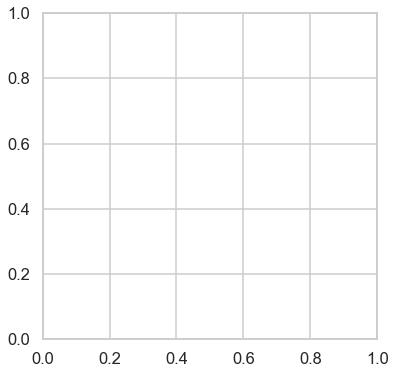

In [47]:
sns.set_context('talk')
f, ax = plt.subplots(figsize= (6,6))
sns.scatterplot(x='pred', y='ret', hue='multiplier',hue_order=['x2','x4','x6'], data=dat, palette = "Purples", legend_out=True, ax=ax)
plt.plot(np.arange(60), np.arange(60), 'black')
plt.ylim(0,60)
plt.savefig('p3pred_xmult_all.pdf')

/Users/bryangonzalez/opt/anaconda3/envs/mTurk/lib/python3.7/site-packages/seaborn/axisgrid.py:98: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text yticklabel objects>)

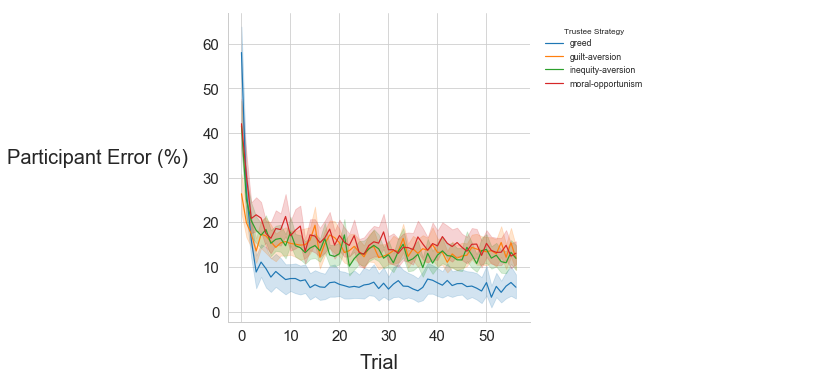

In [3]:
gg = sns.relplot(x='trial', y='turker_pe', hue='p2_strat', kind='line', hue_order=['GR','GA', 'IA', 'MO'], data=dat, legend=False)
gg.set_xlabels('Trial', labelpad=10, fontsize=20)
gg.set_ylabels('Participant Error (%)', rotation=0, fontsize=20, labelpad=105)
gg.add_legend(title='Trustee Strategy', labels=['greed','guilt-aversion', 'inequity-aversion', 'moral-opportunism'],
           title_fontsize=10, loc='upper right', bbox_to_anchor=(1.4, 1) )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#g.axes.legend(['strategy', 'greed', 'guilt-aversion', 'inequity-aversion', 'opportunism'])
#plt.savefig('errs_x_trial.pdf')

Plotting model fits to participants

In [4]:
fits = pd.read_csv('results/final_model_fits2turker_all.csv', index_col=0)
# add p2 index to mod_fit df
fits['p2'] = np.nan
for p2 in dat.trustee.unique():
    p2_turkers = dat.loc[dat.trustee == p2, 'turker_id'].unique()
    fits.loc[fits.turker.isin(p2_turkers), 'p2'] = int(p2)

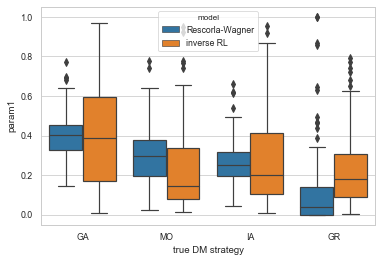

In [5]:
# parameter values
sns.boxplot(x='true DM strategy', y='param1', hue='model', data=fits.loc[fits.model.isin(['inverse RL', 'Rescorla-Wagner'])])


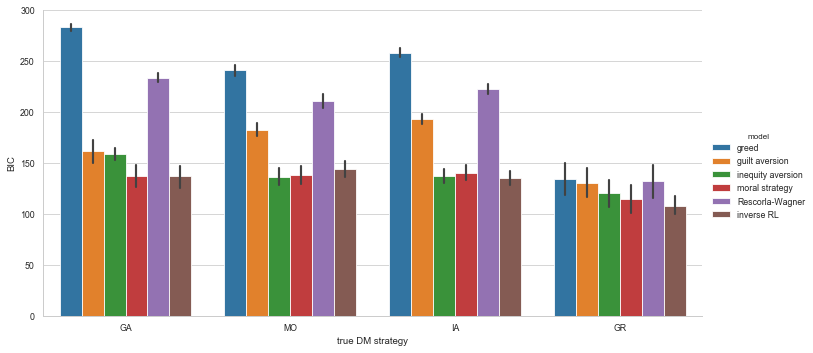

In [14]:
fits = fits.loc[fits.model != 'contextual bandit']
sns.catplot(hue = 'model',  y='BIC',kind='bar', x='true DM strategy', data = fits, aspect=2,
            hue_order=['greed', 'guilt aversion', 'inequity aversion', 'moral strategy', 'Rescorla-Wagner', 'inverse RL'])

plt.savefig('../Figures/p3_modelFits.pdf')

In [20]:
mod_fits = fits.loc[fits.model.isin(['Rescorla-Wagner', 'inverse RL'])]
mod_fits.head()

,turker,param1,param2,SSE,AIC,BIC,model,true DM strategy,p2
3,1,0.484448,NaN,3010.301967,228.104431,230.147482,Rescorla-Wagner,GA,93.0
5,1,0.679100,0.277873,623.000000,140.315229,144.401332,inverse RL,GA,93.0
8,3,0.397540,NaN,3020.560709,228.298350,230.341401,Rescorla-Wagner,GA,81.0
13,3,0.546684,0.378846,773.000000,152.611984,156.698086,inverse RL,GA,81.0
17,4,0.218458,0.116085,875.000000,159.676839,163.762942,inverse RL,MO,54.0


In [30]:
compFit = pd.DataFrame({
    'p3': fits.turker.unique(),
    'p2': [fits.loc[fits.turker == p3, 'p2'].values[0] for p3 in fits.turker.unique()],
    'p2_strat': [fits.loc[fits.turker == p3, 'true DM strategy'].values[0] for p3 in fits.turker.unique()],
    'inverse motive BIC': [fits.loc[(fits.turker == p3)&(fits.model == 'inverse RL'), 'BIC'].values[0] for p3 in fits.turker.unique()],
    'rescorla-wagner BIC': [fits.loc[(fits.turker == p3)&(fits.model == 'Rescorla-Wagner'), 'BIC'].values[0] for p3 in fits.turker.unique()]
})
compFit['fit difference'] = compFit['rescorla-wagner BIC'] - compFit['inverse motive BIC']
compFit.head()

,p3,p2,p2_strat,inverse motive BIC,rescorla-wagner BIC,fit difference
0,1,93.0,GA,144.401332,230.147482,85.746151
1,3,81.0,GA,156.698086,230.341401,73.643315
2,4,54.0,MO,163.762942,202.238605,38.475663
3,5,92.0,MO,136.567412,209.981101,73.413690
4,7,92.0,MO,134.209933,172.330849,38.120916


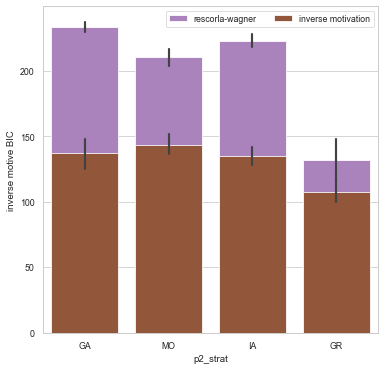

In [46]:
#sns.violinplot(x='p2_strat', y='fit difference', data=compFit)
f, ax = plt.subplots(figsize=(6,6))
sns.barplot(x='p2_strat', y='rescorla-wagner BIC', data=compFit, label="rescorla-wagner", color="#AF7AC5")
sns.barplot(x='p2_strat', y='inverse motive BIC', data=compFit, label="inverse motivation", color="#A0522D")
ax.legend(ncol=2, loc="upper right", frameon=True)
plt.savefig('../Figures/model_diffs.pdf')